In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
##Provavelmente contem outliers
df.charges.idxmax()
df.loc[543]

age                  54
sex              female
bmi               47.41
children              0
smoker              yes
region        southeast
charges     63770.42801
Name: 543, dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df.smoker)
smoker_transformed = le.transform(df.smoker)
df['smoker2'] = smoker_transformed

le.fit(df.sex)
sex_transformed = le.transform(df.sex)
df['sex2'] = sex_transformed

le.fit(df.region)
region_transformed = le.transform(df.region)
df['region2'] = region_transformed

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker2,sex2,region2
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,3
1,18,male,33.770,1,no,southeast,1725.55230,0,1,2
2,28,male,33.000,3,no,southeast,4449.46200,0,1,2
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1


In [10]:
mpl.rcParams['font.size'] = 22


C:\Users\carlo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Gastos com saúde (em dólar)')

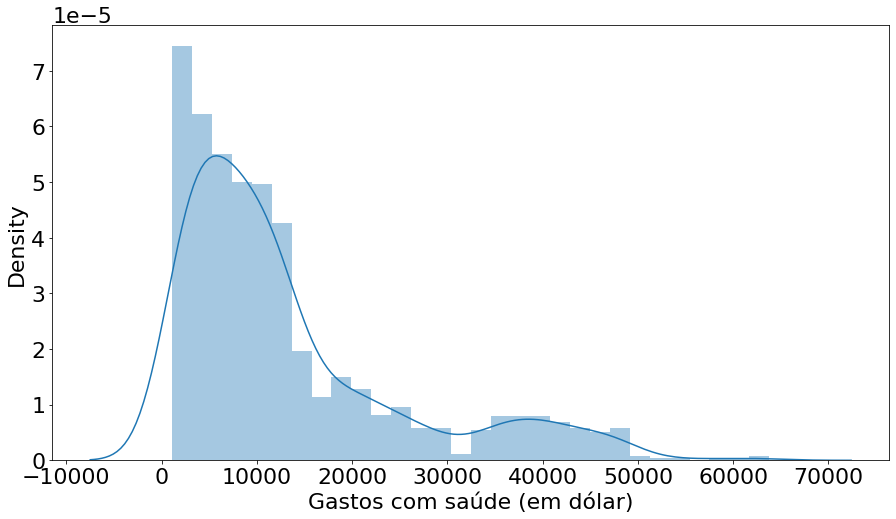

In [11]:
plt.figure(figsize=(15,8))
sns.distplot(df.charges)
plt.xlabel("Gastos com saúde (em dólar)")

C:\Users\carlo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Gastos com saúde (em dólar)')

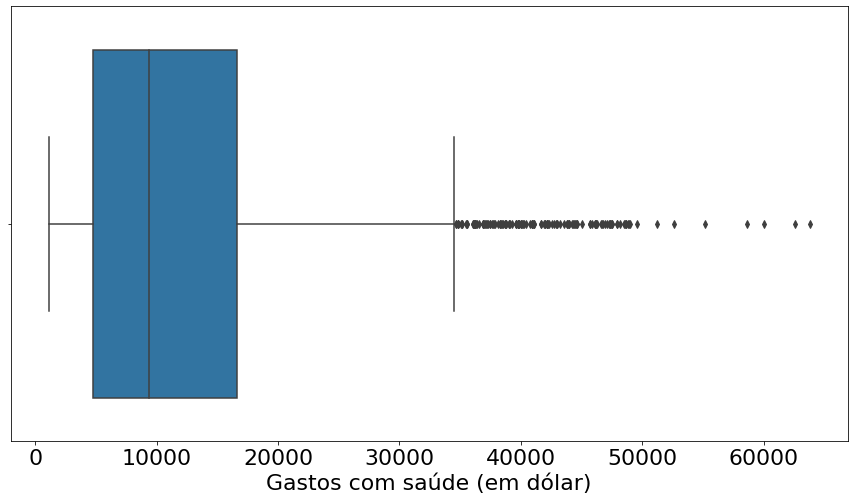

In [12]:
plt.figure(figsize=(15,8))
sns.boxplot(df.charges)
plt.xlabel("Gastos com saúde (em dólar)")

In [13]:
df_query = df.query('charges < 30000')
print(f"O numero de pessoas que pagam mais de 15000 é de {df.shape[0] - df_query.shape[0]}")
df_query.shape

O numero de pessoas que pagam mais de 15000 é de 162


(1176, 10)

C:\Users\carlo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

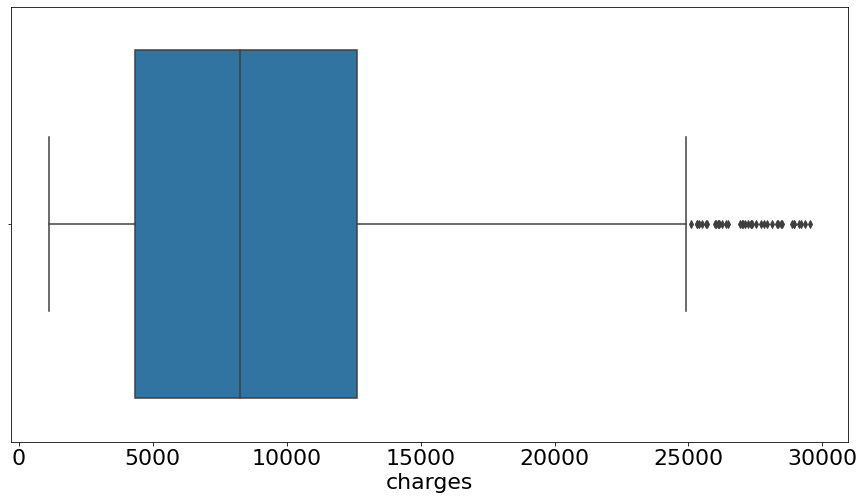

In [14]:
plt.figure(figsize=(15,8))
sns.boxplot(df_query.charges)

C:\Users\carlo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Custos')

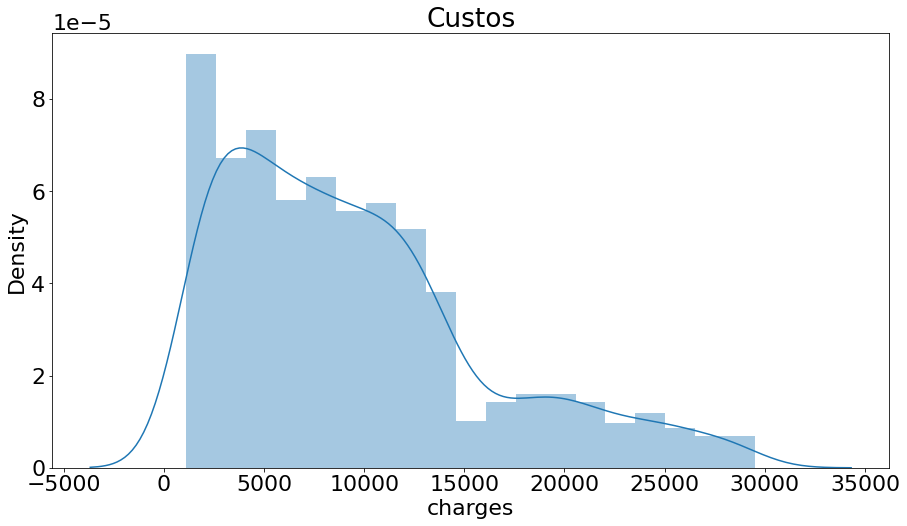

In [15]:
plt.figure(figsize=(15,8))
sns.distplot(df_query.charges)
plt.title("Custos")

In [16]:
df_query["charges_log"] = np.log(df_query.charges)

C:\Users\carlo\AppData\Local\Temp/ipykernel_5752/2537764483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_query["charges_log"] = np.log(df_query.charges)


C:\Users\carlo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Custos')

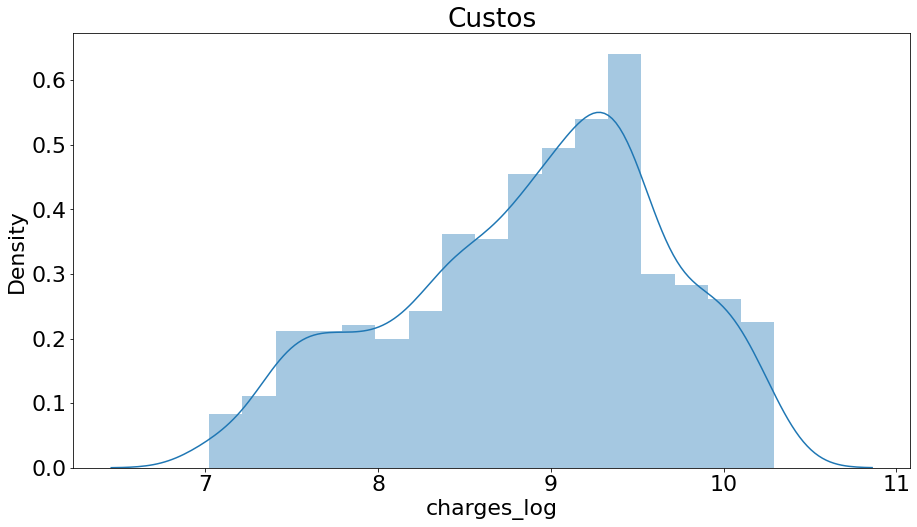

In [17]:
plt.figure(figsize=(15,8))
sns.distplot(df_query.charges_log)
plt.title("Custos")

In [18]:
df2 = df_query.drop(["sex", "smoker", "region"], axis = 1)

In [19]:
df2.head()

,age,bmi,children,charges,smoker2,sex2,region2,charges_log
0,19,27.900,0,16884.92400,1,0,3,9.734176
1,18,33.770,1,1725.55230,0,1,2,7.453302
2,28,33.000,3,4449.46200,0,1,2,8.400538
3,33,22.705,0,21984.47061,0,1,1,9.998092
4,32,28.880,0,3866.85520,0,1,1,8.260197


In [20]:
df2.corr()

,age,bmi,children,charges,smoker2,sex2,region2,charges_log
age,1.000000,0.122240,0.025965,0.513973,-0.037812,-0.022058,0.010188,0.676431
bmi,0.122240,1.000000,0.003858,-0.079617,-0.270649,0.028209,0.153544,-0.039623
children,0.025965,0.003858,1.000000,0.098983,0.003734,0.011596,0.023878,0.196744
charges,0.513973,-0.079617,0.098983,1.000000,0.572800,-0.042633,-0.081153,0.920986
smoker2,-0.037812,-0.270649,0.003734,0.572800,1.000000,0.008682,-0.048271,0.447336
sex2,-0.022058,0.028209,0.011596,-0.042633,0.008682,1.000000,0.003872,-0.070141
region2,0.010188,0.153544,0.023878,-0.081153,-0.048271,0.003872,1.000000,-0.086978
charges_log,0.676431,-0.039623,0.196744,0.920986,0.447336,-0.070141,-0.086978,1.000000


<AxesSubplot:>

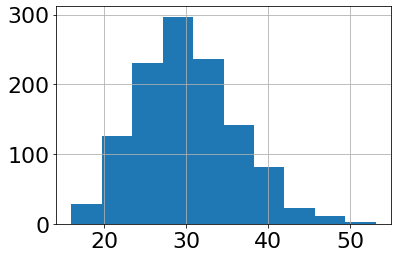

In [21]:
df2.bmi.hist()

In [22]:
df_query.region.value_counts()

southeast    303
northwest    296
northeast    289
southwest    288
Name: region, dtype: int64

<AxesSubplot:>

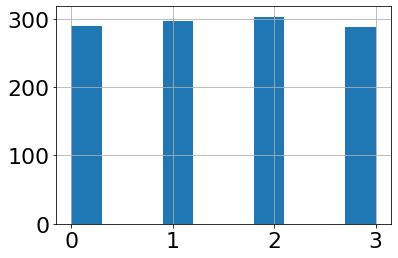

In [23]:
#A região não parece ser um fator muito impactante para o modelo
df2.region2.hist()

In [24]:
from sklearn.model_selection import train_test_split
X = df2.drop(["charges","charges_log", "region2"], axis = 1)
x = X
y= df2.charges_log

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)
X.shape
X_train_pf,X_test_pf,y_train_pf,  y_test_pf = train_test_split(X_poly, y, test_size = 0.2, random_state = 25)

In [26]:
X_train_pf,X_test_pf,y_train_pf,  y_test_pf = train_test_split(X_poly, y, test_size = 0.2, random_state = 25)

In [27]:
x_train, x_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 25)

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_pf, y_train_pf)
pred = lr.predict(X_test_pf)

In [29]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 1000, min_samples_split=12,min_samples_leaf=10,
                           random_state=25)
RFR.fit(x_train, Y_train)
pred2 = RFR.predict(x_test)

In [30]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.2, max_iter = 100000, random_state = 25, copy_X = False, selection = 'random',
             tol = 2e-3)
lasso.fit(X_train_pf, y_train_pf)
pred3 = lasso.predict(X_test_pf)

In [31]:
import xgboost as xg
train_dmatrix = xg.DMatrix(data = x_train, label = Y_train)
test_dmatrix = xg.DMatrix(data =x_test, label = Y_test)
param = {"booster":"dart", "normalize_type":"tree",
        "eta":"0.4", "lambda": "2", "gamma":"0", "alpha": "1", "tree_method":"hist", 'max_depth': "20",
        "min_child_weight":"5", 'learning_rate':'0.4', "min_child_weight":"5", 
         "grow_policy":"lossguide", "max_bin":"100", "max_leaves":"300"}
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round =11)
pred4 = xgb_r.predict(test_dmatrix)

In [32]:
import pickle
with open('PHS_linearRegression.pkl', 'wb') as file:
    pickle.dump(lr, file)

In [37]:
with open('PHS_RandomForest.pkl', 'wb') as file:
    pickle.dump(RFR, file)

In [33]:
from sklearn.metrics import r2_score
print(f"O score do modelo de floresta de decisão é de {r2_score(pred2, Y_test)}")

O score do modelo de floresta de decisão é de 0.8037123737175691


In [34]:
import matplotlib.pyplot as plt
importance = lr.coef_
for i,v in enumerate(importance):
    print('Feature %d: %s, Score: %.5f' % (i, poly.get_feature_names(X.columns)[i], v))



Feature 0: 1, Score: 0.00000
Feature 1: age, Score: 0.05885
Feature 2: bmi, Score: 0.03326
Feature 3: children, Score: 0.41219
Feature 4: smoker2, Score: 0.98298
Feature 5: sex2, Score: -0.12426
Feature 6: age^2, Score: -0.00020
Feature 7: age bmi, Score: -0.00002
Feature 8: age children, Score: -0.00535
Feature 9: age smoker2, Score: -0.02931
Feature 10: age sex2, Score: 0.00476
Feature 11: bmi^2, Score: -0.00049
Feature 12: bmi children, Score: -0.00051
Feature 13: bmi smoker2, Score: 0.01755
Feature 14: bmi sex2, Score: -0.00185
Feature 15: children^2, Score: -0.02124
Feature 16: children smoker2, Score: -0.13058
Feature 17: children sex2, Score: 0.00976
Feature 18: smoker2^2, Score: 0.98298
Feature 19: smoker2 sex2, Score: 0.05769
Feature 20: sex2^2, Score: -0.12426


In [35]:
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['font.size'] = 22
mpl.rcParams['axes.labelcolor'] = 'white'
mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'

Feature 0: age, Score: 0.61647
Feature 1: bmi, Score: 0.02420
Feature 2: children, Score: 0.07410
Feature 3: smoker2, Score: 0.27474
Feature 4: sex2, Score: 0.01049


C:\Users\carlo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Feature importance Random Forest Regressor')

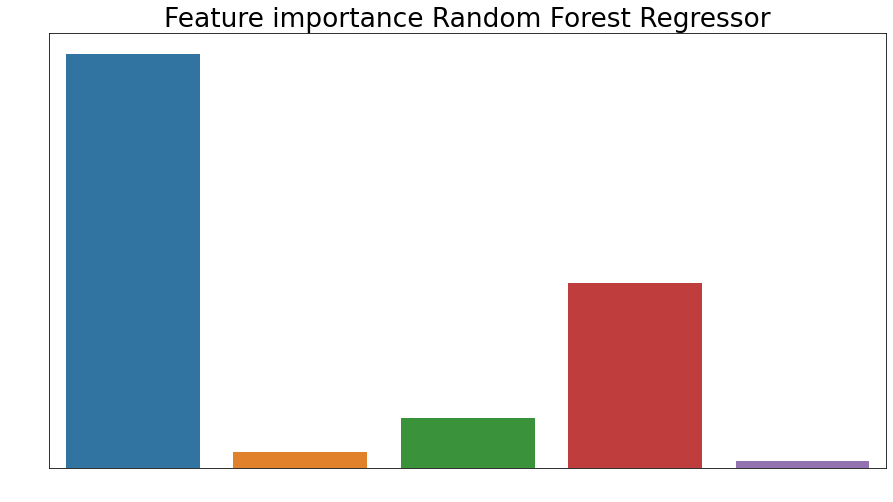

In [36]:
importance = RFR.feature_importances_
for i,v in enumerate(importance):
    print('Feature %d: %0s, Score: %.5f' % (i, x.columns[i],v))
plt.figure(figsize=(15,8))
sns.barplot([x for x in range(len(importance))], importance)
plt.title("Feature importance Random Forest Regressor")
